In [21]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import scipy
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [22]:
# Reads through the CSV file for all eruption results of new-faithful
# "eruption" column is duration of each eruption in minutes
# "waiting_time" column in between eruptions in minutes
df=pd.read_csv('mars_geyser.csv')
df.head()

,eruption,waiting_time
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85


In [23]:
df.shape

(272, 2)

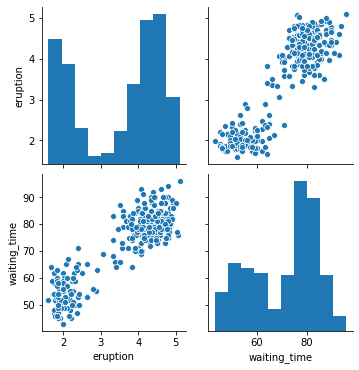

In [24]:
# Create graphs with respect to wait times and eruptions 
sn.pairplot(df)

In [25]:
# Mean of the waiting time between eruptions
df['waiting_time'].mean()

70.8970588235294

In [26]:
# Mean of the length of time of eruptions occurred
df['eruption'].mean()

3.4877830882352936

## Results

Mean waiting time (between eruptions): $70.897$ min

Mean eruption duration (start to finish): $3.4878$ min

In [45]:
# Create Ordinary Least Squares (OLS) Regression model results table 
omod = ols(formula='eruption ~ waiting_time', data=df)
ores = omod.fit()
ores.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               eruption   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     1162.
Date:                Tue, 18 May 2021   Prob (F-statistic):          8.13e-100
Time:                        00:10:30   Log-Likelihood:                -194.51
No. Observations:                 272   AIC:                             393.0
Df Residuals:                     270   BIC:                             400.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -1.8740      0.160    -11.702      0.000      -2.189      -1.559
waiting_time     0.0756      0.002     34.089      0.000       0.071       0.080
==============================================================================
Omnibus:                        4.133   Durbin-Watson:                   2.561
Prob(Omnibus):                  0.127   Jarque-Bera (JB):                3.173
Skew:                          -0.138   Prob(JB):                        0.205
Kurtosis:                       2.548   Cond. No.                         384.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

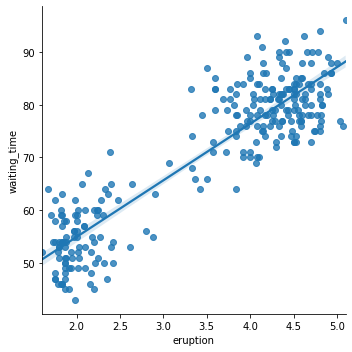

In [48]:
# Generate a graph of relations between eruption and wait time with constant trend line
sn.lmplot(x='eruption', y='waiting_time',data=df)

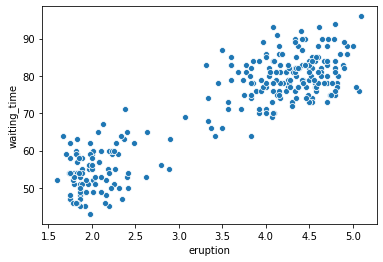

In [49]:
# Between wait time and eruption there is no middle ground
# No such thing as an "average" wait time since either Elon waits short or long period of time
sn.scatterplot(x='eruption',y='waiting_time',data=df)

In [50]:
# Return correlation between eruption and waiting time
# Appears to be positive correlation between eruption and waiting time in this case
df.corr()

,eruption,waiting_time
eruption,1.000000,0.900811
waiting_time,0.900811,1.000000


In [38]:
df['waiting_time'].mean()/60

1.1816176470588233

In [41]:
.1816176470588233*60

10.897058823529399

In [40]:
df['eruption'].mean()

3.4877830882352936

In [42]:
.4877830882352936*60

29.266985294117617

Since both values of eruption and waiting time are positive, there seems to be positive correlation between these two factors as Elon collects data. 

Based on calculating the mean wait time and mean period of eruption, usually Elon would wait more than an hour (approx. 1 hr 10 min or 70 min) between the last eruption and the next one. 

Each eruption, based on the mean eruption time, lasts about 3.5 minutes. 

In [51]:
# Print out the intercept and the slope
print(ores.params[0], ores.params[1])

-1.874015986410737 0.07562794795186271


In [53]:
0.900811*60

54.04866

The longer the eruptions last, the longer the waiting times are in between that eruption and the next one, both in terms of minutes. The shorter the eruptions last, the shorter the waiting times are between eruptions and the more frequent they occur. 

It does appear, however, that based on the plot charts, there are longer wait times in between eruptions and that over a longer period of waiting time, there are more longer eruptions that are to come. 

One of the weaknesses of this model is the fact that there are some periods of time where the waiting time between eruptions are significantly longer than other periods of time in between eruptions. Sometimes eruptions happen by chance, and they can occur in very long periods or in short bursts. 

The linear model appears to be appropriate in that the longer the durations of eruptions, the longer the periods of time waiting in between eruptions. There seems to be positive correlation between eruption duration and waiting time, where the longer the duration of eruptions, the longer Elon would have to wait in between eruptions. 